## Project:- Sentiment Analysis for amazon reviews

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('1429_1.csv')

C:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\core\interactiveshell.py:3155: DtypeWarning: Columns (1,10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
data.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

In [6]:
data=data[['reviews.rating','reviews.text']]

In [7]:
data.head()

,reviews.rating,reviews.text
0,5.0,This product so far has not disappointed. My c...
1,5.0,great for beginner or experienced person. Boug...
2,5.0,Inexpensive tablet for him to use and learn on...
3,4.0,I've had my Fire HD 8 two weeks now and I love...
4,5.0,I bought this for my grand daughter when she c...


#### any missing values?

<AxesSubplot:>

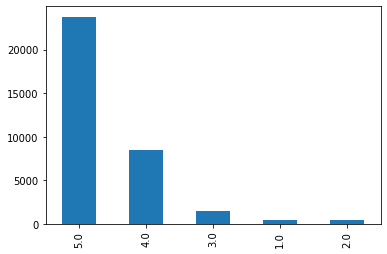

In [8]:
data['reviews.rating'].value_counts().plot(kind='bar')

In [9]:

data2 = pd.read_csv("Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv")
data2 = data2[['reviews.rating' , 'reviews.text']]
data2 = data2[data2["reviews.rating"]<=3]

data3 = pd.read_csv("Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv")
data3 = data3[['reviews.rating' , 'reviews.text']]
data3 = data3[data3["reviews.rating"]<=3]

frames = [data, data2, data3]
df = pd.concat(frames)
df = df.dropna()




In [10]:
df.head()

,reviews.rating,reviews.text
0,5.0,This product so far has not disappointed. My c...
1,5.0,great for beginner or experienced person. Boug...
2,5.0,Inexpensive tablet for him to use and learn on...
3,4.0,I've had my Fire HD 8 two weeks now and I love...
4,5.0,I bought this for my grand daughter when she c...


In [11]:
df.columns

Index(['reviews.rating', 'reviews.text'], dtype='object')


BAD (0) for star rating 1 and 2.
AVERAGE (1) for star rating 3.
EXCELLENT (2) for star rating 4 and 5.

In [12]:
sentiment = {1: 0,
            2: 0,
            3: 1,
            4: 2,
            5: 2}

df["sentiment"] = df["reviews.rating"].map(sentiment)

#print(df[df["sentiment"].isnull()])
df["sentiment"] = pd.to_numeric(df["sentiment"], errors='coerce')                                    
df = df.dropna(subset=["sentiment"])
df["sentiment"]  = df["sentiment"] .astype(int)

In [13]:
def ratings(reviews_rating):
    
    if reviews_rating==5:
        return 2
    elif reviews_rating==4:
        return 2
    elif reviews_rating==3:
        return 1
    elif reviews_rating==1:
        return 0
    else:
        return 0
    

In [14]:
df['ratings']=df['reviews.rating'].apply(ratings)

In [15]:
df['reviews.rating']=df['ratings']

In [16]:
df.drop(['ratings'],axis=1,inplace=True)

In [17]:
df.head()

,reviews.rating,reviews.text,sentiment
0,2,This product so far has not disappointed. My c...,2
1,2,great for beginner or experienced person. Boug...,2
2,2,Inexpensive tablet for him to use and learn on...,2
3,2,I've had my Fire HD 8 two weeks now and I love...,2
4,2,I bought this for my grand daughter when she c...,2


In [18]:
df['reviews.rating'].value_counts()

2    32315
1     2902
0     2510
Name: reviews.rating, dtype: int64

### Text Preprocessing

In [21]:
import string
from nltk.corpus import stopwords
stopwords.words('english')[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [25]:
mess=df['reviews.text'][3].split()

In [26]:
clean_text=[word for word in mess if word.lower() not in stopwords.words('english')]

In [32]:
print(len(' '.join(clean_text)))

382


In [31]:
print(len(df['reviews.text'][3]))

593


Now let's create function to apply our Dataframe leter on

In [42]:
def text_process(mess):
    
    nopunc=[char for char in mess if char not in string.punctuation]
    
    nopunc= ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    #return ' '.join(stop_words)

In [39]:
df.head()

,reviews.rating,reviews.text,sentiment
0,2,This product so far has not disappointed. My c...,2
1,2,great for beginner or experienced person. Boug...,2
2,2,Inexpensive tablet for him to use and learn on...,2
3,2,I've had my Fire HD 8 two weeks now and I love...,2
4,2,I bought this for my grand daughter when she c...,2


In [40]:
df['reviews.text'][:5].apply(text_process)

0    product far disappointed children love use lik...
1    great beginner experienced person Bought gift ...
2    Inexpensive tablet use learn step NABI thrille...
3    Ive Fire HD 8 two weeks love tablet great valu...
4    bought grand daughter comes visit set user ent...
Name: reviews.text, dtype: object

### Vectorization

In [41]:
from sklearn.feature_extraction.text import CountVectorizer

In [44]:
bow_transformer=CountVectorizer(analyzer=text_process).fit(df['reviews.text'])

In [45]:
print(len(bow_transformer.vocabulary_))

23488


In [48]:
text4=df['reviews.text'][3]
print(text4)

I've had my Fire HD 8 two weeks now and I love it. This tablet is a great value.We are Prime Members and that is where this tablet SHINES. I love being able to easily access all of the Prime content as well as movies you can download and watch laterThis has a 1280/800 screen which has some really nice look to it its nice and crisp and very bright infact it is brighter then the ipad pro costing $900 base model. The build on this fire is INSANELY AWESOME running at only 7.7mm thick and the smooth glossy feel on the back it is really amazing to hold its like the futuristic tab in ur hands.


now let's see it's vector representation

In [49]:
bow4=bow_transformer.transform([text4])

In [50]:
print(bow4)
print(bow4.shape)

  (0, 104)	1
  (0, 646)	1
  (0, 667)	1
  (0, 724)	1
  (0, 865)	1
  (0, 2605)	1
  (0, 2969)	1
  (0, 3201)	1
  (0, 3363)	1
  (0, 3930)	1
  (0, 4662)	2
  (0, 5033)	1
  (0, 6404)	1
  (0, 6453)	1
  (0, 6949)	1
  (0, 7555)	1
  (0, 7659)	1
  (0, 8240)	1
  (0, 8243)	1
  (0, 8347)	1
  (0, 9416)	1
  (0, 9577)	1
  (0, 9694)	1
  (0, 10652)	1
  (0, 10862)	1
  :	:
  (0, 12999)	1
  (0, 13329)	1
  (0, 13818)	1
  (0, 14106)	1
  (0, 14660)	1
  (0, 14899)	1
  (0, 15084)	1
  (0, 15133)	2
  (0, 15676)	1
  (0, 15851)	1
  (0, 16175)	2
  (0, 17757)	1
  (0, 18373)	2
  (0, 19128)	1
  (0, 19308)	1
  (0, 20008)	1
  (0, 21003)	1
  (0, 21017)	2
  (0, 21446)	1
  (0, 22047)	1
  (0, 22352)	1
  (0, 22506)	1
  (0, 22820)	1
  (0, 22906)	1
  (0, 22932)	1
(1, 23488)


In [51]:
print(bow_transformer.get_feature_names()[21017])

tablet


In [52]:
text_bow=bow_transformer.transform(df['reviews.text'])

### now TF-IDF

In [55]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer=TfidfTransformer().fit(text_bow)
tfidf4=tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 22932)	0.06909318234744924
  (0, 22906)	0.10627528931201513
  (0, 22820)	0.0841092291343798
  (0, 22506)	0.19821863113914506
  (0, 22352)	0.1570708633649638
  (0, 22047)	0.08898645630289145
  (0, 21446)	0.16546992100187105
  (0, 21017)	0.09689879753389682
  (0, 21003)	0.12480957953047314
  (0, 20008)	0.12400427733495155
  (0, 19308)	0.07290993359571689
  (0, 19128)	0.1243221532276898
  (0, 18373)	0.1427034045534055
  (0, 17757)	0.1543913325663932
  (0, 16175)	0.16293536901294656
  (0, 15851)	0.082140932640222
  (0, 15676)	0.10751071914316163
  (0, 15133)	0.11434725352246405
  (0, 15084)	0.10361205579774632
  (0, 14899)	0.06204521103895766
  (0, 14660)	0.19821863113914506
  (0, 14106)	0.11847251866284686
  (0, 13818)	0.19821863113914506
  (0, 13329)	0.10246152481154945
  (0, 12999)	0.10925274172216774
  :	:
  (0, 10862)	0.10048739120226649
  (0, 10652)	0.08974417737137899
  (0, 9694)	0.12582525210209594
  (0, 9577)	0.18554970068923032
  (0, 9416)	0.10160905617506161
  (0, 8347)	0.

In [58]:
text_tfidf=tfidf_transformer.transform(text_bow)
print(text_tfidf.shape)

(37727, 23488)


### Training a Model

In [63]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB().fit(text_tfidf, df['reviews.rating'])
print(model.predict(tfidf4[0]))

[2]


### model Evaluation

In [64]:
all_predictions=model.predict(text_tfidf)

In [65]:
from sklearn.metrics import classification_report
print(classification_report(df['reviews.rating'], all_predictions))

              precision    recall  f1-score   support

           0       0.86      0.28      0.42      2510
           1       0.85      0.04      0.07      2902
           2       0.88      1.00      0.93     32315

    accuracy                           0.88     37727
   macro avg       0.86      0.44      0.47     37727
weighted avg       0.87      0.88      0.83     37727



In [68]:
#model.score(all_predictions,df['reviews.rating'])

In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
train_test_split(df['reviews.text'], df['reviews.rating'], test_size=0.2)



### Train Test Split

In [75]:
from sklearn.pipeline import Pipeline

pipeline=Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB()),
])

In [76]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x0000020357C2D550>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

#### model evaluation

In [77]:
y_predictions=pipeline.predict(X_train)

In [78]:
print(classification_report(y_predictions,y_test))

ValueError: Found input variables with inconsistent numbers of samples: [30181, 7546]